<a href="https://colab.research.google.com/drive/1ptHKuZbXz0zp4g8z-OTrdyAIamNop57P?usp=sharing" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM : génération de mélodies

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importations

In [4]:
import sys
import os
import json
import matplotlib.pyplot as plt

In [3]:
sys.path.append('/content/drive/MyDrive/')
sys.path.append('/content/drive/MyDrive/data')
sys.path.append('/content/drive/MyDrive/LSTM')

In [4]:
from extract_data import *
from melodypreprocessor import *
from melodygenerator import *
from LSTM import *
from train import *
from visualization import *

## Extraction des données des fichiers xml

In [5]:
'''#Extractions des partitions a partir des fichiers xml
path_to_xml = "/content/drive/MyDrive/data/data_xml"
file_output = "/content/drive/MyDrive/data/data.json"

D = data_to_json(path_to_xml)
with open(file_output, 'w',encoding="utf-8") as f:
    json.dump(D,f,indent=2)
print(f'{file_output} with {len(D)} scores created.')'''

'#Extractions des partitions a partir des fichiers xml\npath_to_xml = "/content/drive/MyDrive/data/data_xml"\nfile_output = "/content/drive/MyDrive/data/data.json"\n\nD = data_to_json(path_to_xml)\nwith open(file_output, \'w\',encoding="utf-8") as f:\n    json.dump(D,f,indent=2)\nprint(f\'{file_output} with {len(D)} scores created.\')'

## Extraction des mélodies

In [6]:
'''#Extraction des melodies par partie
filename = "/content/drive/MyDrive/data/dataset"
size_melody = 3 #en mesure ( 1000 = max de la partie )
time_signatures = set(["2/4"]) #prend toutes les time signatures par default

parts_len = json_into_part_melody("/content/drive/MyDrive/data/data.json",output_file=filename,size=size_melody,time_signatures=time_signatures)
print("Toutes les melodies ont étés générées par parties. Tailles des parties : "+" ".join([f"{key} : {length} " for key,length in parts_len]))'''

'#Extraction des melodies par partie\nfilename = "/content/drive/MyDrive/data/dataset"\nsize_melody = 3 #en mesure ( 1000 = max de la partie )\ntime_signatures = set(["2/4"]) #prend toutes les time signatures par default\n\nparts_len = json_into_part_melody("/content/drive/MyDrive/data/data.json",output_file=filename,size=size_melody,time_signatures=time_signatures)\nprint("Toutes les melodies ont étés générées par parties. Tailles des parties : "+" ".join([f"{key} : {length} " for key,length in parts_len]))'

## Création du modèle

In [5]:
melody_preprocessor = MelodyPreprocessor("data/dataset4A.json", batch_size=32)
train_dataset = melody_preprocessor.create_training_dataset()
vocab_size = melody_preprocessor.number_of_tokens_with_padding
max_length_melody = melody_preprocessor.max_melody_length
nb_batchs=len(train_dataset)
print("Taille du vocabulaire :",vocab_size)
print("Taille de la plus grande mélodie :",max_length_melody)

Taille du vocabulaire : 240
Taille de la plus grande mélodie : 42


In [6]:
embedding_dim = 64
model = LSTMModel(vocab_size,embedding_dim,max_length_melody)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entraînement du modèle

In [7]:
epochs = 10
iters,losses = train(train_dataset,model,epochs)

Training the model ...


C:\Users\jeffs\anaconda3\envs\envTorch\lib\site-packages\keras\backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


Epoch 1 Batch 1 Loss 5.479544162750244
Epoch 1 Batch 2 Loss 5.47453498840332
Epoch 1 Batch 3 Loss 5.470486640930176
Epoch 1 Batch 4 Loss 5.464188098907471
Epoch 1 Batch 5 Loss 5.457319259643555
Epoch 1 Batch 6 Loss 5.447361469268799
Epoch 1 Batch 7 Loss 5.440037250518799
Epoch 1 Batch 8 Loss 5.420222282409668
Epoch 1 Batch 9 Loss 5.415032863616943
Epoch 1 Batch 10 Loss 5.380440711975098
Epoch 1 Batch 11 Loss 5.353950500488281
Epoch 1 Batch 12 Loss 5.309932231903076
Epoch 1 Batch 13 Loss 5.190918922424316
Epoch 1 Batch 14 Loss 5.120247840881348
Epoch 1 Batch 15 Loss 5.021713733673096
Epoch 1 Batch 16 Loss 5.041017532348633
Epoch 1 Batch 17 Loss 4.785309314727783
Epoch 1 Batch 18 Loss 4.559201717376709
Epoch 1 Batch 19 Loss 4.516027927398682
Epoch 1 Batch 20 Loss 4.412078857421875
Epoch 1 Batch 21 Loss 4.360698223114014
Epoch 1 Batch 22 Loss 4.165665626525879
Epoch 1 Batch 23 Loss 4.1378397941589355
Epoch 1 Batch 24 Loss 4.235395908355713
Epoch 1 Batch 25 Loss 4.112264633178711
Epoch 1 B

KeyboardInterrupt: 

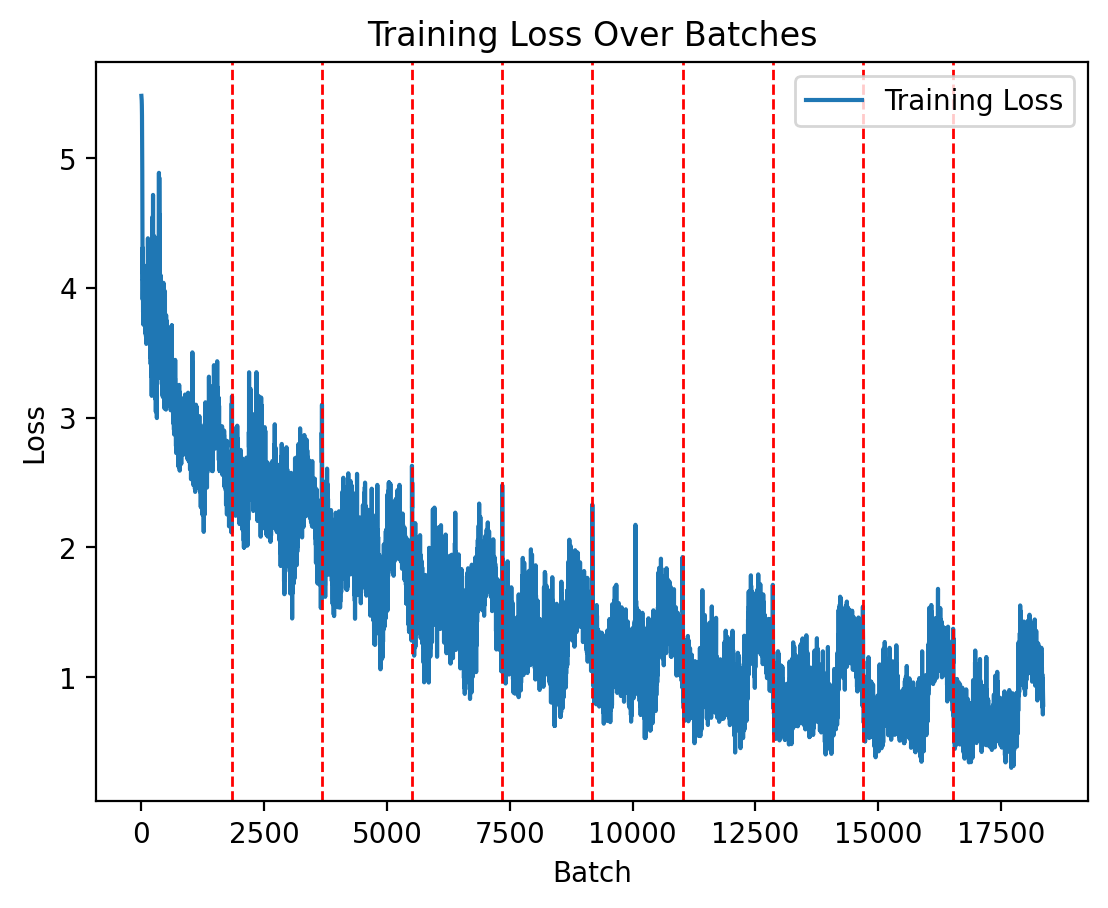

In [10]:
plot_losses(iters,losses,nb_batchs)

## Génération

#### Paramètres

In [1]:
melodie_size = 4 #Taille de la mélodie originale qu'on utilise
lg_debut = 2 #Nombre de mesures pour la sequence initiale
lg_predict = 2 #Nombre de mesures pour la sequence prédite
nb_melodies= 20
max_notes = 8*lg_debut+8*lg_predict

MODE_DECALAGE=False #On prend lg_debut mesure de l'original pour prédire lg_predict et on decale
RANDOM_START=False #On commence la mélodie a une mesure aléatoire de la partie ( pour ne pas forcément avoir que les débuts)

AFFICHAGE_HISTOGRAMME=False #Voir les probabilites d'origines et resultante du mode 2 

melody_generator = MelodyGenerator(
    model, melody_preprocessor.tokenizer,max_notes
)

NameError: name 'MelodyGenerator' is not defined

In [ ]:
error_part_A= ['Sarau para Radamés','DESPREZADO','ACARICIANDO','Dino Pintando o Sete Cordas','Ja Te Digo','CHORANDO','É DO QUE HÁ','O BOÊMIO']
melodies_generated=[]
mode=2 #0 highest prob   #2 categorical + temperature + topk sampling
forcing=0 #entre 0 et 1, pourcentage de chance d'utiler les notes extraites de l'originale lors de la prédiction
top_k=300

for _ in range(nb_melodies):
    print("Generating a melody...")
    seq=extract_random_seq("assets/data.json",1,"A")
    print(f'Titre de l_original : {seq[0]}')
    original= extract_seq_from("assets/data.json",'Tico-Tico No Fubá',seq[2],mode="mesure")[-1]

    #Tant que la partie extraite ne correspond pas a la time signature ou quelle contient des mesures vides ( a fix)
    while seq[1]!= "2/4" or (seq[0] in error_part_A and MODE_DECALAGE):
        seq=extract_random_seq("assets/data.json",1,"A")
        original= extract_seq_from("assets/data.json",seq[0],seq[2],mode="mesure")[-1]

    if MODE_DECALAGE:
        new_melody,p = generate_decalage(melody_generator,original,lg_debut,lg_seq,mode=mode,k=top_k,first_proba=0.6)
        p = [ prob for proba in p for prob in proba][:len(new_melody)]
        original=[ n for m in original for n in m]
    else:
        index_start= random.randint(0, len(original) - (1+melodie_size)) if RANDOM_START else 0
        debut= original[index_start:index_start+lg_debut]
        original=[ n for m in original[index_start:index_start+melodie_size] for n in m]
        print(index_start)
        print(original)
        debut=[ n for m in debut for n in m]
        print(f'Sequence de départ : {debut}')
           
        new_melody,p = melody_generator.generate(debut,forcing=forcing,melody=original,mode=mode,k=top_k,first_proba=0.4,affichage_histogramme=(mode==2 and AFFICHAGE_HISTOGRAMME) )
        new_melody=new_melody.split(' ')
        new_melody=n_measure(new_melody,lg_predict+lg_debut,"2/4")

        melody_lenght= len(new_melody)
        #proba
        p= [1]*len(debut)+p
        p=p[:melody_lenght]
    melodies_generated.append((seq,new_melody,original,p,index_start))
    print(new_melody)
    print(len(new_melody))
    print(len(p),p)

    print('---------------------')

print('Génération terminée')


#### Enregistrement

In [ ]:
 generated = [ {'Title' : s[0] , "Time_signature" : s[1], 'Part': s[2], 'Key' : s[3] ,'Mesure' : i+1 ,'Generated' : m , 'Original' : o , 'Proba' :[ str(prob) for prob in p ]} for (s,m,o,p,i) in melodies_generated ]

In [ ]:
file_output=f'melody{melodie_size}_' if melodie_size!=1000 else ''
file_output+=f'mode{mode}'
file_output+=f'_top{top_k}' if mode==2 else ''
file_output+=f'_forcing{forcing}' if (forcing>0 and mode==2) else ''
print(file_output)

with open(f'Generated/LSTM/{file_output}.json',"w") as f:
    json.dump(generated,f,indent=2)



In [ ]:
with open(f'/content/drive/MyDrive/Generated/{file_output}.json',"w") as f:
    json.dump(generated,f,indent=2)

## Visualisation

In [2]:
import music21
from music21 import *

#### Toutes les mélodies générées

In [3]:
show_all_generated(f"Generated/{file_output}.json").show("musicxml")

NameError: name 'show_all_generated' is not defined

#### Comparaison de la mélodie i avec son original

In [78]:
num_melodie = 1
score = compare_generated(num_melodie, file_name=f"Generated/LSTM/{file_output}.json")
score.show("musicxml")

The file 'Generated/LSTM/mode2_top20_forcing0.2.json' does not exist. Exiting program.


AttributeError: 'NoneType' object has no attribute 'show'